### Multiple Linear Regression: $$y = b_{0} + b_{1}x_{1} + b_{2}x_{2}^{2} + ... +b_{n}x_{n}^{n}$$

## Main Task
> Predicting the net hourly electerical energy output of a plant!

## Data Understanding  

**1.0. What is the domain area of the dataset?**  
The dataset *Cycle_Powerplant* contains information combined cycle power plant collected over 6 years!

**1.1. Under which circumstances was it collected?**  
The data had been collected between 2006 - 2011 and when the power plant was set to work with full load!  

**2.0. Which data format?**  
The dataset has the *CSV* format!  

**2.1. Do the files have headers or another file describing the data?**  
Yes, the file has headers!  

**2.2. Are the data values separated by commas, semicolon, or tabs?**  
The data values are separated by commas;
Example: 
*Amgen Temperature,Exhaust Vaccum,Ambient Pressure,Relative Humidity,Energy*  
*14.96,41.76,1024.07,73.17,463.26*  

**3.0 How many features and how many observations does the dataset have?**  
The dataset has:  
* 5 features or columns!  
* 9568 observations or rows!  

**4.0 Does it contain numerical features? How many?**  
The dataset only contains numerical features, 5 numerical features!  


In [18]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
RANDOM_STATE = 42

In [10]:
powerPlant = pd.read_csv('../Datasets/Cycle_Powerplant.csv')

### Dataset's Features/Variables

**Amgen Temperature** (AT) in the range 1.81°C and 37.11°C!  
**Ambient Pressure** (AP) in the range 992.89-1033.30 milibar!  
**Relative Humidity** (RH) in the range 25.56% to 100.16%!  
**Exhaust Vacuum** (V) in teh range 25.36-81.56 cm Hg!  
**Net hourly electrical energy** output (EP) 420.26-495.76 MW!  

## Basic Exploratory Data Analysis

In [11]:
powerPlant.head()

,Amgen Temperature,Exhaust Vaccum,Ambient Pressure,Relative Humidity,Energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [12]:
powerPlant.describe()

,Amgen Temperature,Exhaust Vaccum,Ambient Pressure,Relative Humidity,Energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [13]:
print(f"Number of features in the dataset is {powerPlant.shape[1]} and the number of observations/rows in the dataset is {powerPlant.shape[0]}")

Number of features in the dataset is 5 and the number of observations/rows in the dataset is 9568


### Handling Missing Values

In [14]:
powerPlant.isnull().sum()

Amgen Temperature    0
Exhaust Vaccum       0
Ambient Pressure     0
Relative Humidity    0
Energy               0
dtype: int64

In [15]:
powerPlant.isna().sum()

Amgen Temperature    0
Exhaust Vaccum       0
Ambient Pressure     0
Relative Humidity    0
Energy               0
dtype: int64

### Correlation between variables

Correlation is only between numerical variables, (the dataset only contains numerical features!)

In [17]:
correlation_matrix = powerPlant.corr()

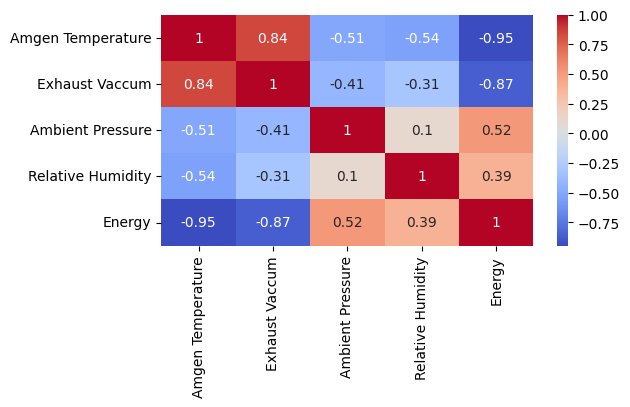

In [20]:
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.show()